# Эпизод 1

In [3]:
import numpy as np
from PIL import Image
import scipy.ndimage.interpolation

# считаем картинку в numpy array
path = '/Users/nikitasemenov/environments/judge/NumPy/'
for i in range(1, 4):
    img = Image.open('lunar0{}_raw.jpg'.format(i))
    data = np.array(img)
    # ... логика обработки
    updated_data = np.around((data - data.min()) / (data.max() - data.min()) * 255).astype(np.uint8)
    # запись картинки после обработки
    res_img = Image.fromarray(updated_data)
    res_img.save("lunar0{}.jpg".format(i))

# Эпизод 2

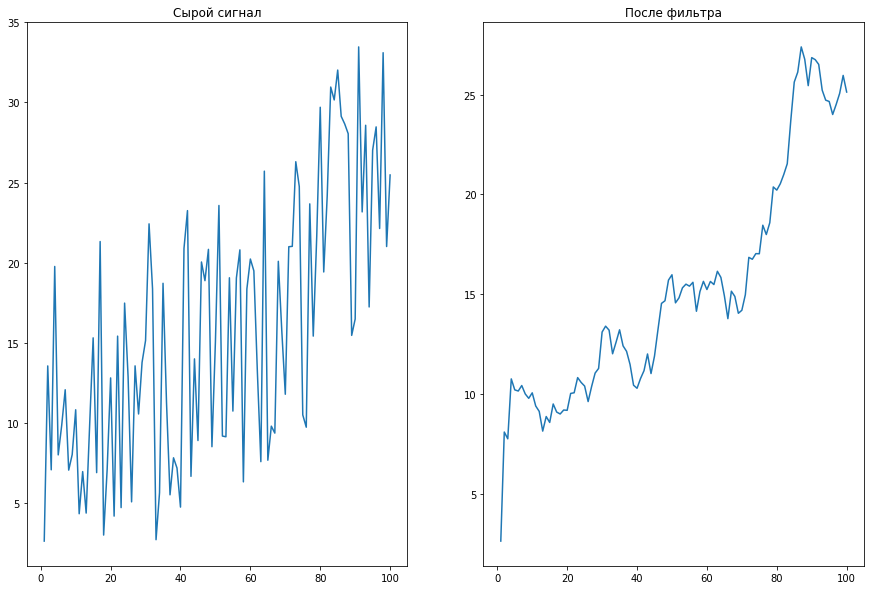

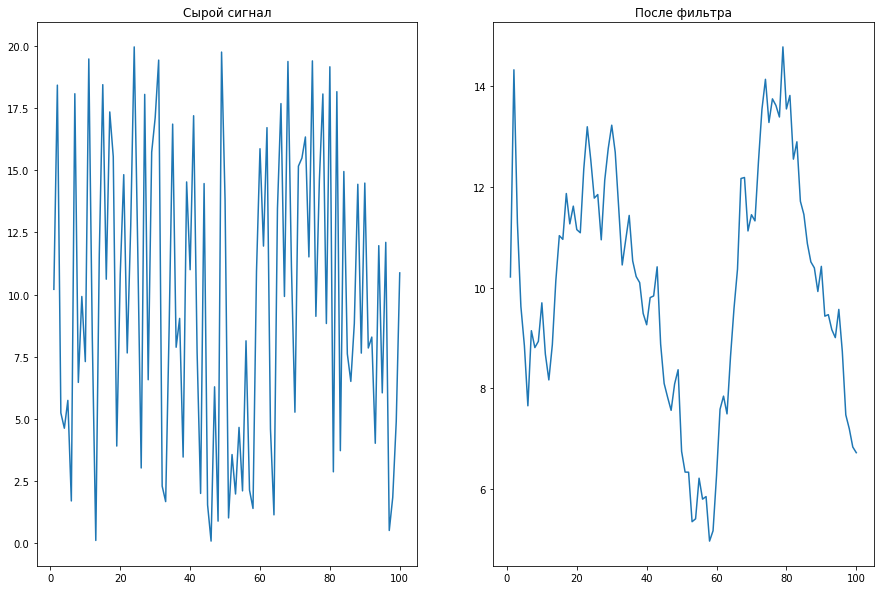

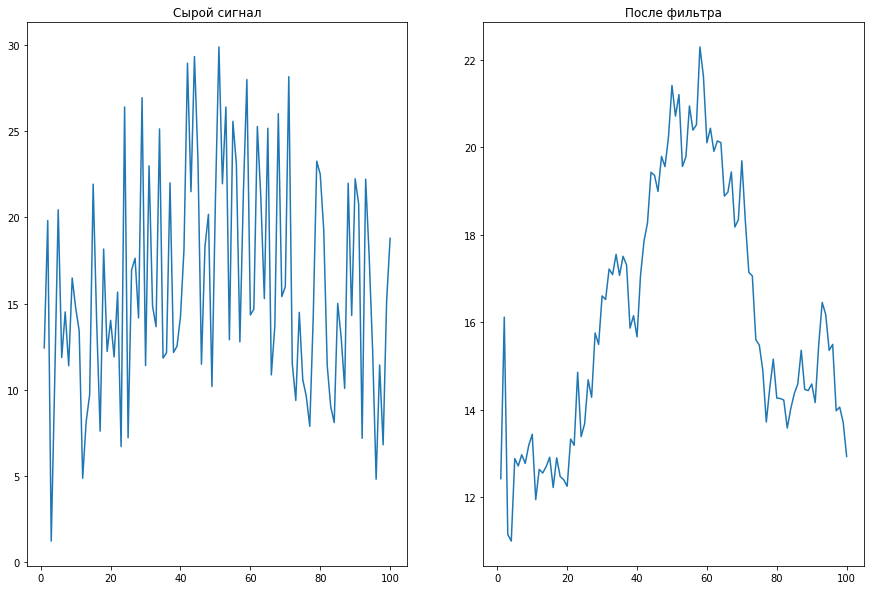

In [8]:
import matplotlib.pyplot as plt
data = []


for i in range(1, 4):
    data.append('signal0{}.dat'.format(i))
    
    
def readfile(filename):
    with open(filename) as f:
        els = f.read().split()
        mass = np.array([float(el) for el in els])
    return mass


for file in data:
    arr = readfile(file)
    figure, ax = plt.subplots(1, 2, figsize=(15,10))
    ax[0].plot(np.arange(1, 101), arr)
    ax[0].set_title('Сырой сигнал')
    nr = [np.mean(arr[: el])if el < 10 else np.mean(arr[ el- 9 : el + 1]) for el in range(1, 101)]
    ax[1].plot(np.arange(1, 101), nr)
    ax[1].set_title('После фильтра')
    plt.show()
        

# Эпизод 3

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


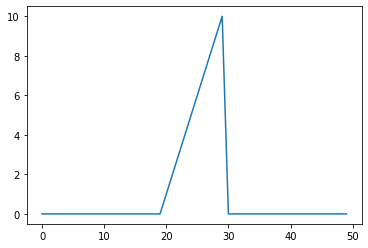

In [40]:
from matplotlib.animation import FuncAnimation

def readfile(filename):
    with open(filename) as f:
        els = f.read().split()
        mass = np.array([float(el) for el in els])
    return mass
data = readfile('start.dat')
plt.plot(data)
print(data)

In [49]:
A = np.zeros((50, 50))
np.fill_diagonal(A, 1)

diag = np.diagonal(A, offset = -1)
diag.setflags(write=True)
diag.fill(-1)

[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,
        7.,  8.,  9., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 1.5, 2.5, 3.5, 4.5, 5.5,
       6.5, 7.5, 8.5, 9.5, 5. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]), array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 1.  ,
       2.  , 3.  , 4.  , 5.  , 6.  , 7.  , 8.  , 9.  , 7.25, 2.5 , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]), array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.  

NameError: name 'start_data' is not defined

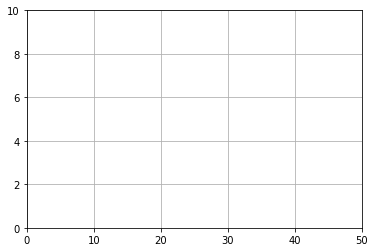

In [86]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 50), ylim=(0, 10))
ax.grid()
line, = ax.plot([], [], lw=1)
u = [start_data]

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 50, 50)
    tmp = u[i] - 0.5 * A @ u[i]
    u.append(tmp)
    line.set_data(x, tmp)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=255, interval=5, blit=True)
 
 
anim.save('result.gif', writer='pillow')